# Similarities Between Wines
Module 0 | Chapter 2 | Notebook 3

*** 
Now that you have mastered the geometric interpretation of vectors, you can apply this knowledge to making a product recommendation for wines. The goal is to be able to recommend wines from the database to the customers, that are similar to wines that they have liked in the past.
Let's start with a somewhat deeper look into the wine data set. Then you'll get to know the cosine similarity, which we'll use to rank the wines in order based on their similarity to certain wines. At the end of the notebook, you'll learn how to write a Python function that recommends wines from the database based on their similarity to a wine we liked. 
By the end of this exercise you will be able to:


* Calculate product similarities using the properties of vectors
* Write your own functions and provide them with a *docstring*

***


## Product recommendation


**Scenario:** 1001Wines is an online retailer that sells wines through its website. 1001Wines would like to recommend its customers high-quality wines that might be to their taste.
They therefore want to create a recommendation tool to compare the similarity of purchased wines with other wines from the assortment. If a wine from the range is similar to what customers have already ordered, it should be recommended to them.


Now you can use what you have learned about vectors to carry out the product recommendation. Import the data first. The wine data set is located in the file *wine-quality.csv*. Store the data as a `DataFrame` named `df`. Display the first 5 rows of `df`.


In [2]:
import pandas as pd
df = pd.read_csv('wine-quality.csv')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white


Each row represents one wine. Each column represents a chemical property of the wine. And `color` tells us whether it is a red or white wine. We are in luck because the data has already been well prepared. You don't have to clean or check the data. Which characteristics can help us to make a good distinction? Very often, people like either red or white wine more than the other. So if we find two properties where red and white wines span an angle close to 90°, the similarity predicted by our cosine measure would be approximately zero. 
In order to find suitable properties, we can use the `pairplot()` function from the `seaborn` module. 

```python
sns.pairplot(data=df, # define the DataFrame to plot
             hue='Column_name' # colors the data points based on the categories in this column
             ,palette=['color_1','color_2'] # with this you can specify the colors for the data points
            )
```

This function is a useful tool to get a first impression of the data set. Now let's use it to take a look at the data set.


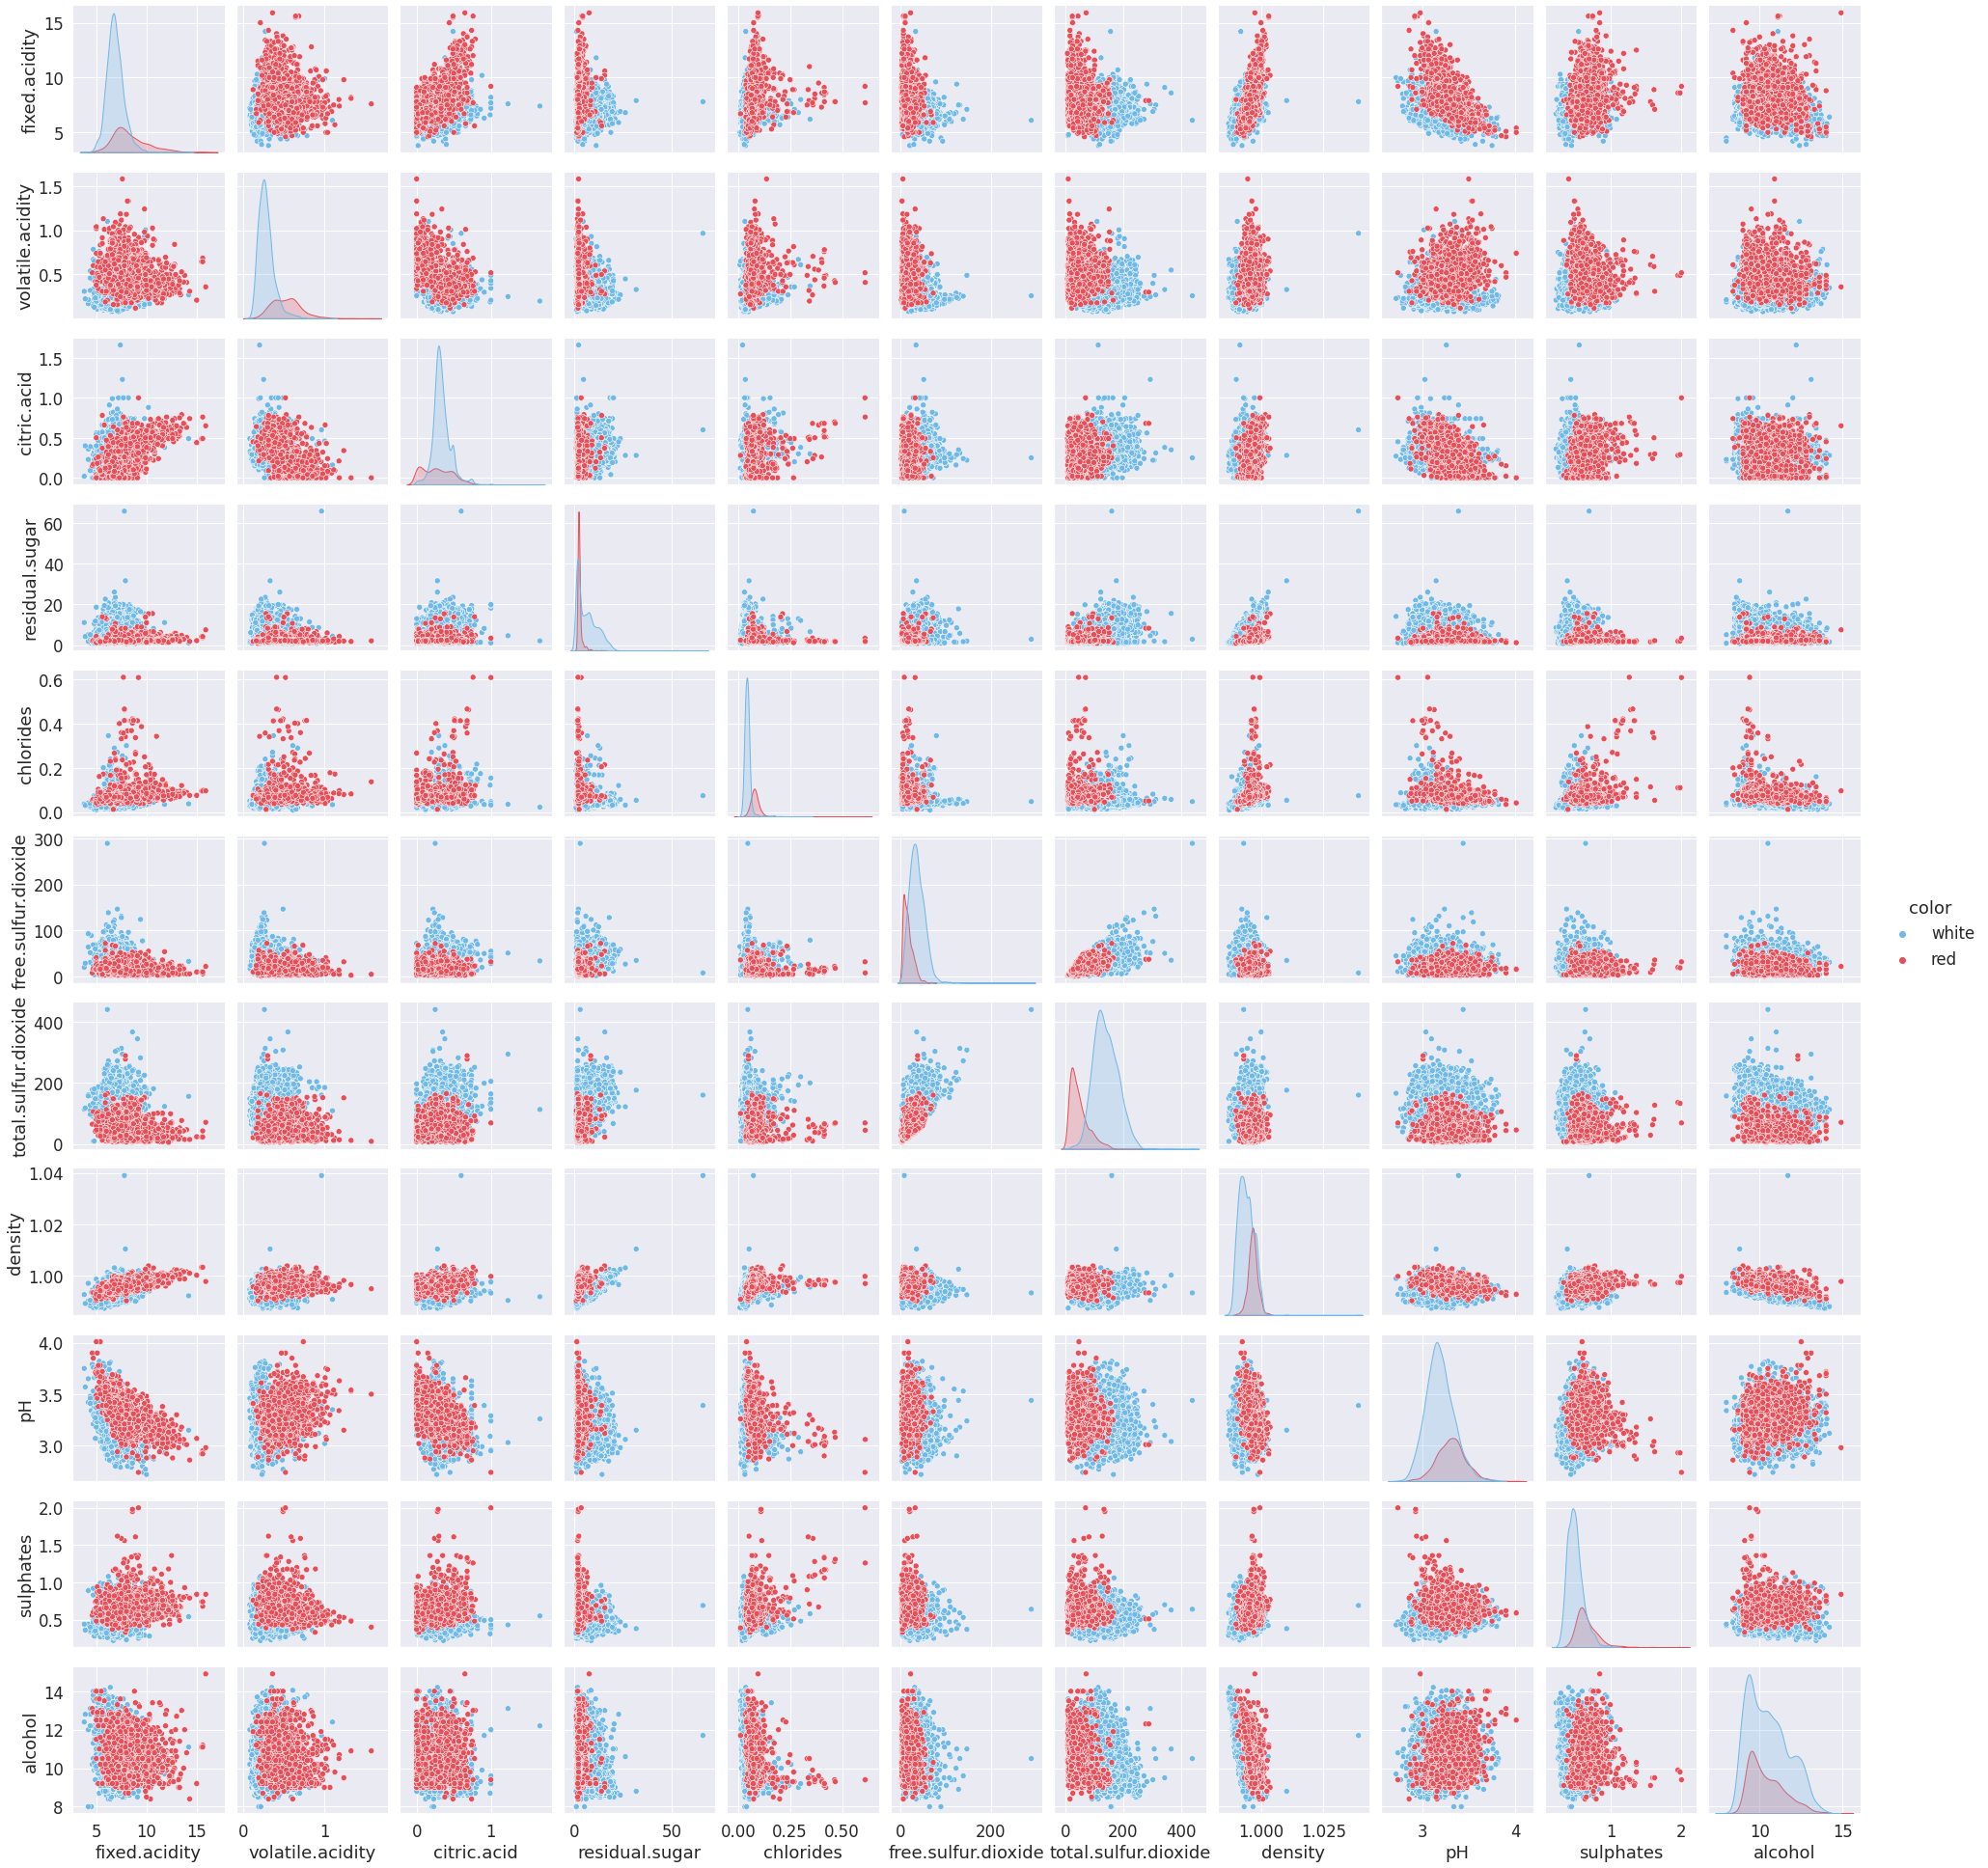

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5) #make fonts bigger
sns.pairplot(data=df, hue='color', palette=['#70b8e5','#e54f59']);

I find that the wine types are relatively well distributed on both axes for the value pair `residual.sugar` and `sulphates`, covering as large an angle as possible. Run the following cell see these properties in more detail:


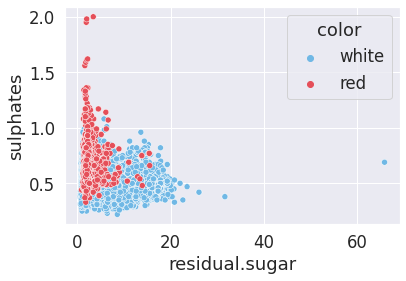

In [75]:
sns.scatterplot(data=df, x='residual.sugar', y='sulphates', hue='color',  
                palette=['#70b8e5','#e54f59']);

The white wines (blue) are spread out extensively on the axis of `residual.sugar`. The sweetness of the white wine varies more than it does for the red wines (red). The amount of sulphates, on the other hand, varies more among the red wines. These two characteristics are well suited for the recommendation if we want to separate between red and white wines. This is because the angle between the types of wine is relatively large.


We now want to use these properties to write a function that will make the recommendation. Approach it step by step:

The similarity is measured by the cosine of the angle between the vectors $\mathrm{\vec{wine_1}}$ und $\mathrm{\vec{wine_2}}$. This is calculated using the following formula:

\begin{equation}
\cos \sphericalangle_{\mathrm{\vec{wine_1},\vec{wine_2}}} = \frac {\mathrm{\vec{wine_1}} \cdot \mathrm{\vec{wine_2}}}{\left(||\mathrm{\vec{wine_1}}|| \cdot ||\mathrm{\vec{wine_2}}||\right)}
\end{equation}

Here $||\vec{x}||$ denotes the norm of the vector $\vec{x}$. Only the columns `['residual.sugar','sulphates']` should be used to determine how similar the wines are.

First calculate the cosine similarity between the wines with index `0` and `1`. To do this, define a variable `cols`, containing the required column names as a list. This will reduce the amount of typing you have to do. Use `my_df.loc[]` to select the required wines and columns and pass these to `np.dot()` to calculate the scalar product. Then divide the scalar product by the product of the length of the two vectors. You can calculate the length with `norm()` from `numpy.linalg`. Make sure you only select necessary wines and columns here as well. Assign the values to the variable `similarity` and print this.

Tip: Since `pandas` already uses `ndarray` internally, you don't need to convert anything to calculate the similarity. The functions access the `my_df.values` attribute directly.


In [9]:
import numpy as np
from numpy.linalg import norm

cols = ['residual.sugar', 'sulphates']
vec1 =  df.loc[0,cols]
vec2 =  df.loc[1,cols]
np.dot(vec1 ,vec2) / (norm(vec1) *  norm(vec2)) 

0.9623042303439455

We get about `0.96` for `similarity`.


Later on we want the recommendation function to take the index of a wine and return the most similar wine. To prepare this function we need a loop that performs the similarity calculation to the given wine for each wine. If the similarity is greater than `0.9999`, the index of the wine should be appended to a list named `recommendations`. Use the wine with index `0` as the reference wine again. Solve this with a `for` loop containing an `if` statement. How many entries does `recommendations` contain?

Tip: A loop header requires an object representing a sequence. For example, you can use the `range()` function to create this, as you have done in the past. But you can also access the row names of a `DataFrame` directly if you use `df.index` instead. This is then already a sequence that you can use directly in your `for` loop.

The loop is relatively long. So it might take a few seconds before all the calculations are finished.


In [31]:
recommdations = []
vec =  df.loc[0,cols]

for i in range(1, len(df.index)):
    vec2 =  df.loc[i,cols]
    similarity = np.dot(vec ,vec2) / (norm(vec) *  norm(vec2))
    
    if similarity > 0.9999:
        recommdations.append(df.loc[i,:])

len(recommdations)

634

You can pass values to the parameters by entering the values in the correct order. But you can also use the name of the parameter with a equal sign `=`. There is no difference. But if you specify one parameter name, then you have to specify all the subsequent parameter names that you assign values to. Otherwise you will get the error: `SyntaxError: positional argument follows keyword argument`.

Throughout this course, we will often work with functions that have a great deal of parameters. Usually these have a default value. This means you only need to remember the names of the most important parameters (not their position) to work well with the functions.


Now let's return to recommending a wine. Write a function called `wine_recommendation`. This has 3 parameters:

* `df_wines`: The `DataFrame`, which contains the wine data

* `wine_id`: The row index of a wine on which the recommendation is based

* `sim_min`: A floating point number that indicates the minimum level of similarity the wines should have to be recommended

The output is a list called `recommendations`, which contains the index of wines with a similarity greater than `sim_min`.

`wine_recommendation` only contains the code you have already written further up.

Here's the `Docstring`:


```python
def wine_recommendation(df_wines, wine_id, sim_min):
    """Return positions of wines in df_wines, which are similar to the wine at position wine_id.
    
    Use cosine-similarity as measure of similarity between two wines.
    
    Args:
        df_wines (DataFrame): Contains the wines quality data.
        wine_id (int): Position in df_wines of the wine, on which the recommendation is based.
        sim_min (float): Controls the minimum similarity wines must have to be recommended. Only values between -1 and 1 should be used.

    Returns:
        recommendations (list): Contains the positions of wines that are similar to wine_id with a value of at least sim_min."""
```


In [58]:


def wine_recommendation(df_wines, wine_id, sim_min):
    """Return positions of wines in df_wines, which are similar to the wine on position wine_id.
    
    Use cosine-similarity as measure of likeness between two wines.
    
    Args:
        df_wines (DataFrame): Contains the wines-quality data.
        wine_id (int): Position inside df_wines of the wine, on which the recommendation is based.
        sim_min (float): Controlls the minimum similarity wines must have to be recommended. Only values between -1 and 1 should be used.

    Returns:
        recommendations (list): Contains the positions of wines that are similar to wine_id with a value of at least sim_min.
        
    """

    recommdations = []
    vec =  df_wines.loc[wine_id,cols]

    for i in range(len(df_wines)):
        vec2 =  df_wines.loc[i,cols]
        similarity = np.dot(vec2 ,vec) / (norm(vec2) *  norm(vec) )

        if similarity >= sim_min:
            recommdations.append(i)
    return recommdations

Now use the `help()` function to see if the *docstring* is displayed.


In [37]:
help(wine_recommendation) 

Help on function wine_recommendation in module __main__:

wine_recommendation(df_wines, wine_id, sim_min)
    Return positions of wines in df_wines, which are similar to the wine on position wine_id.
    
    Use cosine-similarity as measure of likeness between two wines.
    
    Args:
        df_wines (DataFrame): Contains the wines-quality data.
        wine_id (int): Position inside df_wines of the wine, on which the recommendation is based.
        sim_min (float): Controlls the minimum similarity wines must have to be recommended. Only values between -1 and 1 should be used.
    
    Returns:
        recommendations (list): Contains the positions of wines that are similar to wine_id with a value of at least sim_min.



If you write a function yourself, you should also test it. For this purpose, you select arguments where you have some kind of expectation of what the result should be, and see if the output is what you would expect it to be. Our expectations are that every wine should be most similar to itself and that more wines will be recommended, the lower `sim_min` is. The following table shows what we would expect from the output of the function when we pass certain values (input).

Input | Output | Comment
---|---|---
`wine_id = 0`, `sim_min = 0.999999999`, `df_wines = df` | `list` with the value `0` | The `list` could contain other values, if other wines have the same values in the corresponding columns. We can't use `sim_min = 1` because there is a very small deviation due to the internal number representation.
`wine_id = 0`, `sim_min = 0.8`, `df_wines = df` | `list` with more values than before | The lower `sim_min` is, the more values the `list` should contain.

Check the expectations by returning the output for the first set of arguments and the length of the `list` for the second set. The loop will call each function for everything, so the calculation may take a few seconds.


In [57]:
print(len(wine_recommendation(df,0,0.999999999)))
print(len(wine_recommendation(df,0,0.8)))

2
6484


With the smaller value for `sim_min` we get significantly more recommendations. So this seems to work correctly. This also shows us that we have to use a relatively high value for `sim_min` if we want to recommend a smaller selection of wines.


An obvious distinction between the wines is their color. I would assume that white wines are more similar to other white wines. I would also assume the same with red wines. Let's try this out next and visualize the result. Calculate the recommendations for the `wine_ids` 0 and 6400. This is a white and a red wine. Use the `sim_min` value `0.99999` both times. Store the recommendations as `recommendation_0` and `recommendation_6400`.


In [72]:
recommendation_0 = wine_recommendation(df,0,0.99999)
recommendation_6400 = wine_recommendation(df,6400,0.99999)
print(recommendation_0)
print(recommendation_6400)

[0, 7, 34, 38, 39, 103, 105, 182, 191, 218, 225, 229, 261, 265, 292, 369, 398, 410, 414, 630, 631, 846, 946, 967, 972, 992, 1043, 1078, 1083, 1088, 1119, 1156, 1157, 1159, 1161, 1206, 1487, 1489, 1524, 1529, 1566, 1608, 1642, 1644, 1684, 1687, 1696, 1707, 1722, 1727, 1742, 1755, 1775, 1879, 1881, 1885, 1888, 1892, 1893, 1973, 1974, 2051, 2052, 2056, 2093, 2094, 2110, 2111, 2112, 2115, 2131, 2132, 2164, 2206, 2326, 2328, 2334, 2368, 2411, 2489, 2492, 2536, 2543, 2620, 2641, 2701, 2702, 2703, 2707, 2725, 2785, 2787, 2829, 3014, 3023, 3144, 3145, 3146, 3148, 3151, 3175, 3209, 3232, 3244, 3338, 3348, 3420, 3459, 3469, 3497, 3533, 3545, 3547, 3730, 3833, 3876, 3880, 3881, 3884, 3888, 4046, 4054, 4084, 4107, 4250, 4252, 4279, 4368, 4393, 4454, 4455, 4456, 4457, 4460, 4523, 4778]
[93, 124, 332, 335, 471, 472, 511, 523, 754, 947, 1018, 1045, 1114, 1155, 1325, 1354, 1821, 2030, 2061, 2423, 2425, 2603, 2604, 2612, 2635, 2841, 2965, 3099, 3107, 3111, 3117, 3254, 3281, 3285, 3286, 3287, 3304, 3306

We can now display these recommendations as a scatter plot. Run the following cell.


Text(0.5, 1.0, 'Wines similar to wine_id = 0')

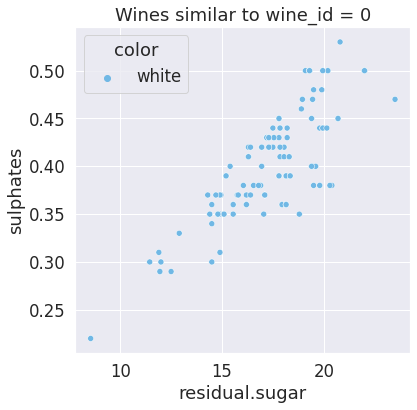

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 6])
sns.scatterplot(data=df.loc[recommendation_0, :], hue='color', x='residual.sugar', y='sulphates', palette=['#70b8e5'], ax=ax)  # palette defines the color blue
ax.set_title('Wines similar to wine_id = 0')

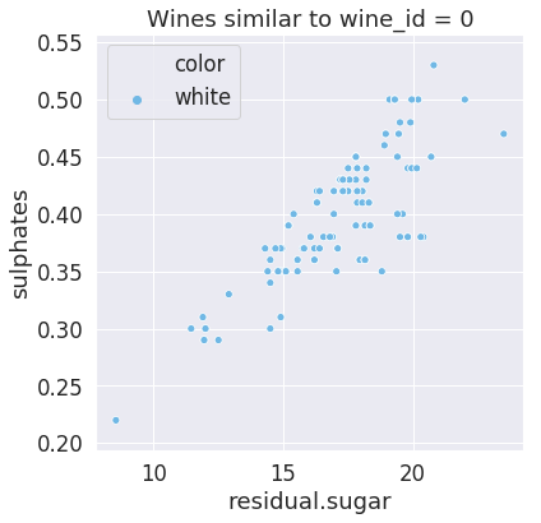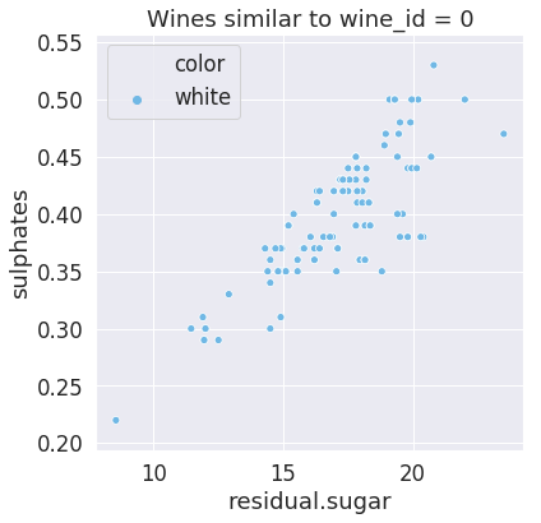We received the following picture for the recommendation:

![Wine recommendation for index 0](00-02-02-pic5.png)


Here we can see that a relatively high number of wines are being recommended. If we increase `sim_min`, we can keep on limiting the number of recommendations. Furthermore we can see that only white wines have been recommended. This was exactly the reason we decided on the features `['residual.sugar', 'sulphates']`. Now let's have a look at the wines, which are similar to the red wine with index 6400. Run the following cell once.


Text(0.5, 1.0, 'Wines similar to wine_id = 6400')

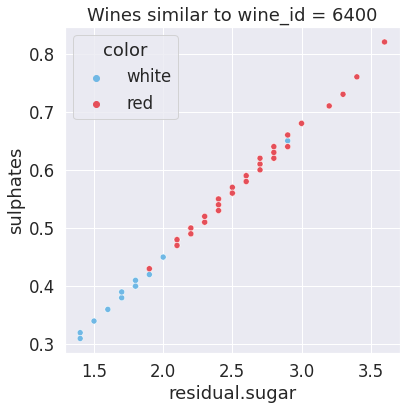

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 6])
sns.scatterplot(data=df.loc[recommendation_6400, :], hue='color', x='residual.sugar', y='sulphates', palette=['#70b8e5', '#e54f59'], ax=ax)  # palette defines colors blue and red
ax.set_title('Wines similar to wine_id = 6400')

I get the following picture for the recommendation:

![Wine recommendation for index 0](00-02-02-pic6.png)


Fewer wines are recommended here, but we have been recommended both red and white wines. In this example, we can see very well that the recommendation only includes wines whose vectors span a narrow angle (the scattering of points is very small). All data points within this angle are then considered to be similar. The proportions of sulphates and sugar are therefore still very similar within the recommendations. We can recognize this by the fact that the data points representing the wines are on a straight line. However, the absolute values can differ wildly. Whether the percentages or absolute values are more important for the taste, is a question for the experts. In the next lesson we'll look at an alternative for cosine and learn what norms are.


**Congratulations**: You have written a function to recommend products! You can use this cosine similarity method not just for wines, but for all kinds of products. We decided just to use two features. But this isn't a limitation of the method. We could also have used all columns. The calculation remains exactly the same. But it would be more difficult to visualize the results.

The product managers of 1001Wines are happy with how quickly you developed this recommendation tool and they pass on their thanks!


**Remember**: 
* Quantify the similarity of two products by the angle of their vectors with cosine similarity.
* Define your own functions with `def`
* Add a `docstring` to your own functions so that you and other people using your function understand what your function does.


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
The data was published here first: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 
***
